In [10]:
#IMPORTS
%run ../datuslib.ipynb

In [11]:
#Settings

pd.set_option("max_rows", None)

In [12]:
#CARGA DATA

A_tweets = pd.read_csv(generateAbsolutePath("train.csv"))

/home/Hal9000/DatosRepo


In [159]:
A_tweets2 = A_tweets.copy()
#SAMPLE_SIZE = 1000
#A_tweets2 = A_tweets.head(SAMPLE_SIZE)
A_tweets2['keyword'].fillna('', inplace = True)
A_tweets2['location'].fillna('', inplace = True)
texts = list(A_tweets2['keyword'] + ' ' + A_tweets2['location'] + ' ' + A_tweets2['text'])

In [175]:
context = Context(load = 'A_context')

FileNotFoundError: [Errno 2] No such file or directory: '/home/axelmpm/DatosRepo/Axel/A_context_wordNet'

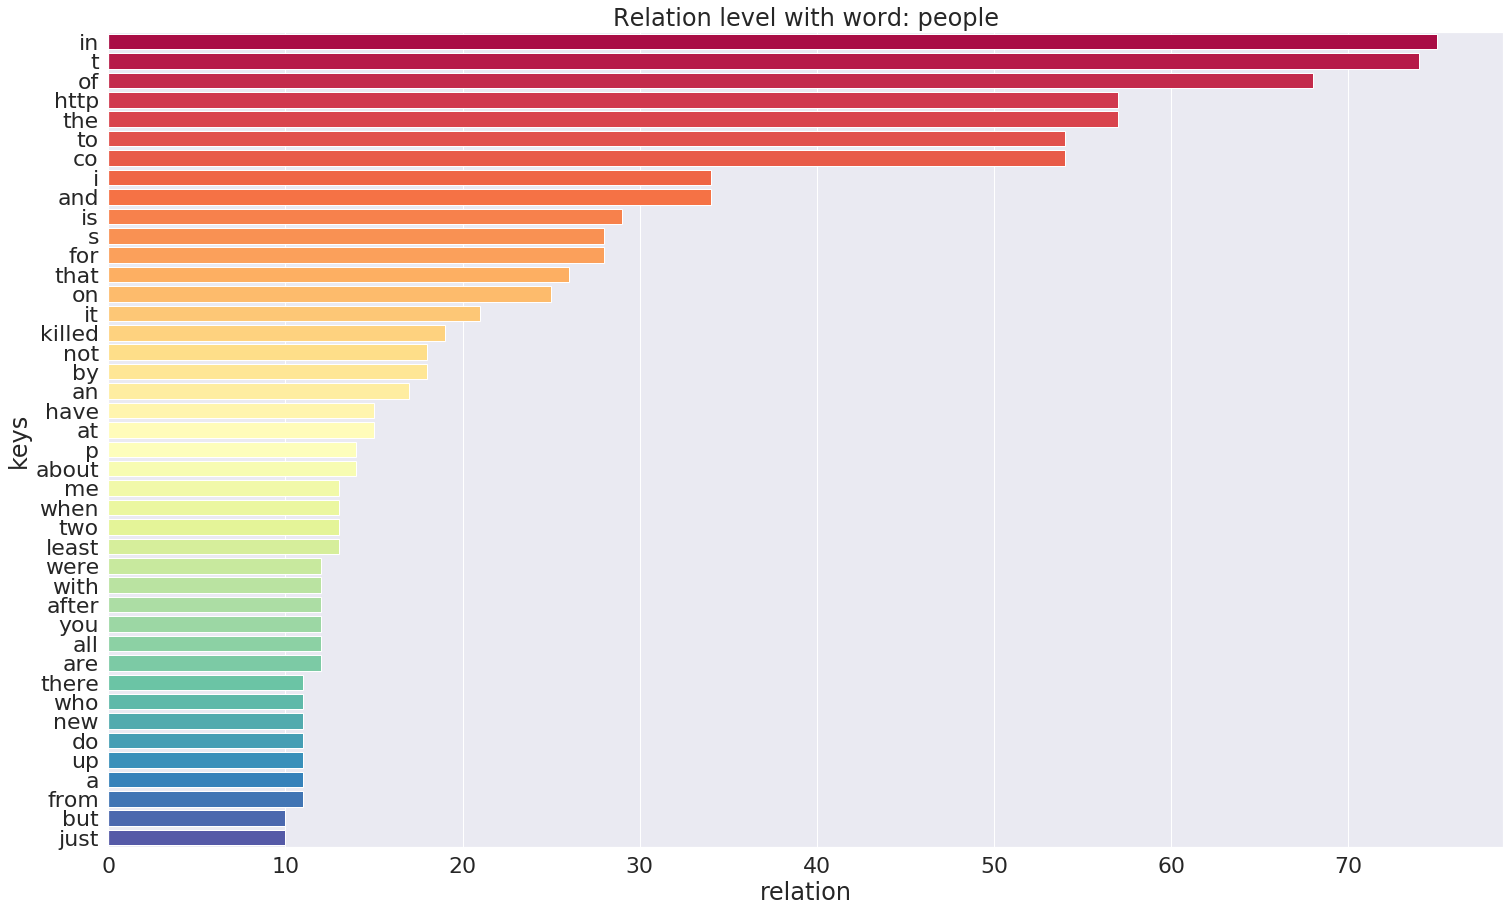

In [173]:
word = 'people'
df = dicToDataFrame(dict(context.related(word , r = 10, restrict = True)))
barplot('values','keys', df, xLabel = 'relation', title = 'Relation level with word: ' + word,
        fontSize = 2, figY = 15)

In [ ]:
#la negatividad de toda palabra (noun, porque si no es noun es cero) 
#en context es la frecuencia de uso en el df en desastres dividido 
#la cantidad de veces que fue usada en todo el df

#ademas la negatividad de cada palabra se descompone en intriceca y contextual
#esta contextual es la suma de la transefernecia de las demas palabras que se relacionan
# se calcula como reinforcemente/ suma de reinforcements * negatividad intrinceca de fuente

#la negatividad de una frase es la suma de las negatividades de cada palabra

In [665]:
#OBTIENE TODAS LAS PALABRAS EN INGLES QUE FIGURAN EN CAMPO text, keyword y location

A_tweets3 = A_tweets.copy().dropna()

A_bagOfWords = (A_tweets['text'].sum() + A_tweets3['keyword'].sum() + A_tweets3['location'].sum()).split(' ')

In [ ]:
A_bagOfEnglishWords, A_bagOfNonEnglishWords = clasifyWordsRespectToEnglish(A_bagOfWords)

In [173]:
A_words = getDataFrameOfFrecuencies('Palabras',A_bagOfEnglishWords)

In [185]:
A_words2 = A_words.copy()

A_treshold = 5

A_words2 = A_words2[ A_words2.apply(lambda row : len(row['Palabras']) > A_treshold, axis = 1)]

In [195]:
A_TOP_AMOUNT = 25
A_topWords = A_words2.head(A_TOP_AMOUNT)

[Text(0.5, 1.0, 'Palabras mas usadas en Tweets, Localizacion o Keywords (de mas de 5 letras)')]

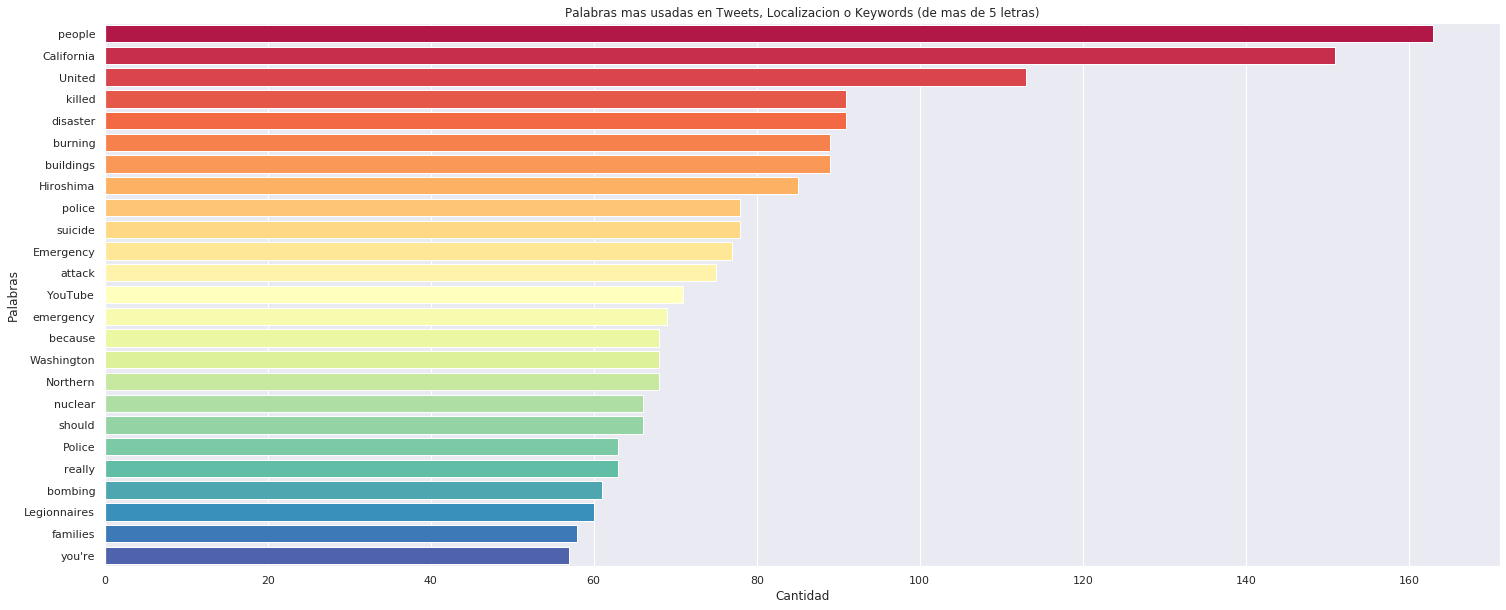

In [197]:
sns.set(font_scale = 1.3)
sns.set(rc = {'figure.figsize':(25,10)})
v3 = sns.barplot(x = 'Cantidad', y = 'Palabras', data = A_topWords, 
                 palette = 'Spectral', saturation = 1)

v3.set(title = 'Palabras mas usadas en Tweets, Localizacion o Keywords (de mas de 5 letras)')

In [212]:
A_words3 = A_words2[ A_words2.apply(lambda row : isIn(row['Palabras'],A_NEGATIVE_WORDS), axis = 1)]

In [217]:
A_TOP_AMOUNT = 25
A_topWords = A_words3.head(A_TOP_AMOUNT)

[Text(0.5, 1.0, 'Palabras negativas mas usadas en Tweets, Localizacion o Keywords (de mas de 5 letras)')]

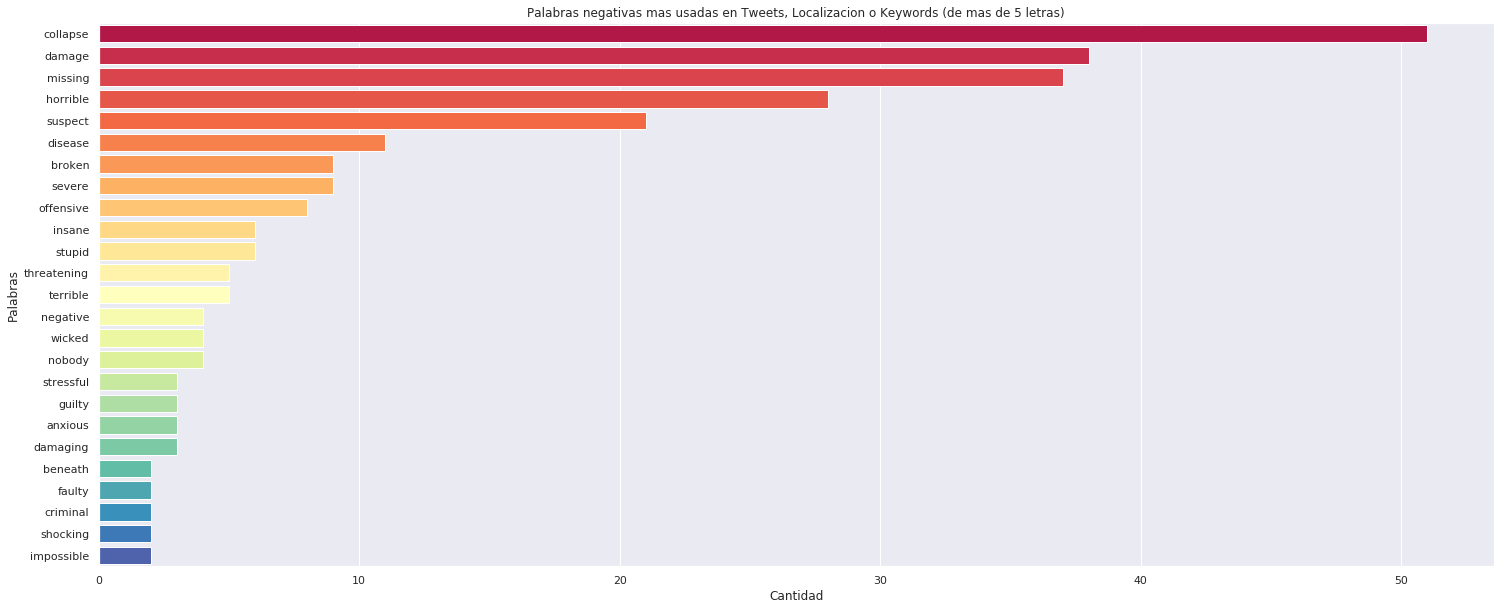

In [219]:
sns.set(font_scale = 1.3)
sns.set(rc = {'figure.figsize':(25,10)})
v3 = sns.barplot(x = 'Cantidad', y = 'Palabras', data = A_topWords, 
                 palette = 'Spectral', saturation = 1)

v3.set(title = 'Palabras negativas mas usadas en Tweets, Localizacion o Keywords (de mas de 5 letras)')

In [220]:
#OBTIENE TODAS LAS PALABRAS EN INGLES QUE FIGURAN EN CAMPO text, keyword y location de tweets con desastre

A_tweets4 = A_tweets[A_tweets['target'] == 1]
A_tweets5 = A_tweets4.copy().dropna()

A_bagOfWordsDisaster = (A_tweets4['text'].sum() + A_tweets5['keyword'].sum() + A_tweets5['location'].sum()).split(' ')

A_bagOfEnglishWordsDisaster, A_bagOfNonEnglishWordsDisaster = clasifyWordsRespectToEnglish(A_bagOfWordsDisaster)

In [221]:
A_wordsDisasters = getDataFrameOfFrecuencies('Palabras',A_bagOfEnglishWordsDisaster)

In [222]:
A_treshold = 5

A_words4 = A_wordsDisasters[ A_wordsDisasters.apply(lambda row : len(row['Palabras']) > A_treshold, axis = 1)]

In [223]:
A_TOP_AMOUNT = 25
A_topWords = A_words4.head(A_TOP_AMOUNT)

[Text(0.5, 1.0, 'Palabras mas usadas en Tweets de desastres, Localizacion o Keywords (de mas de 5 letras)')]

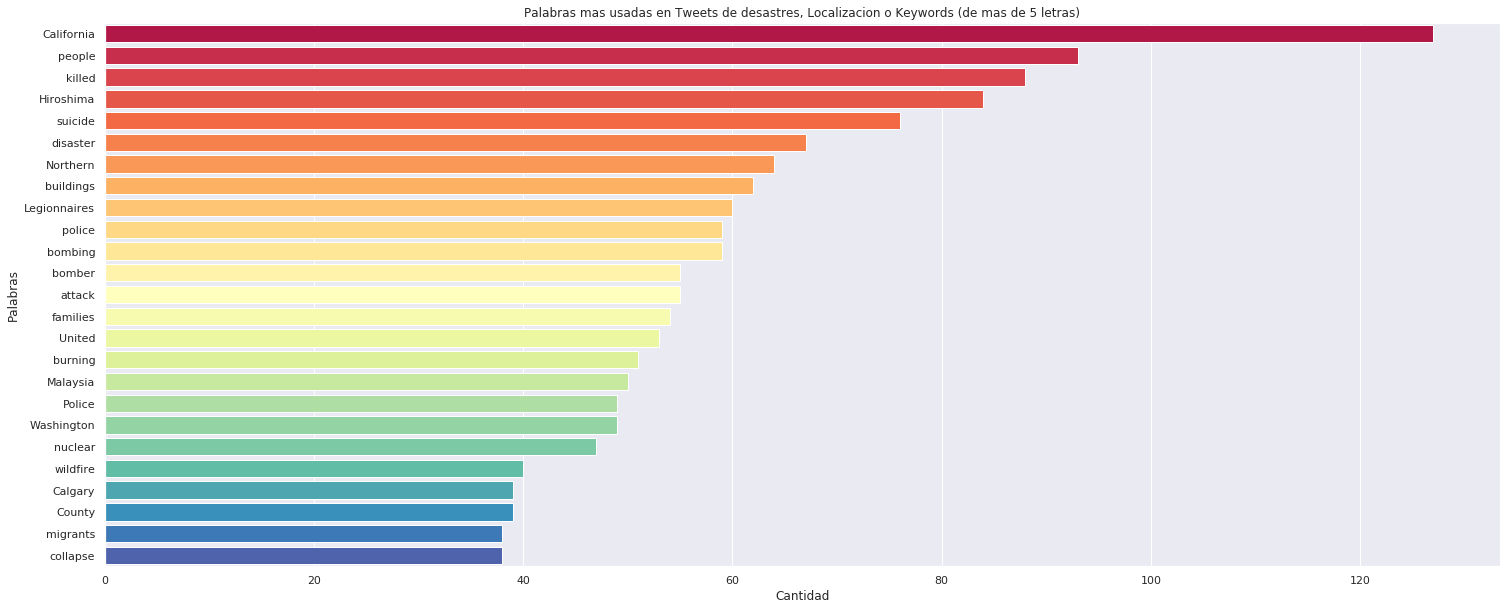

In [225]:
sns.set(font_scale = 1.3)
sns.set(rc = {'figure.figsize':(25,10)})
v3 = sns.barplot(x = 'Cantidad', y = 'Palabras', data = A_topWords, 
                 palette = 'Spectral', saturation = 1)

v3.set(title = 'Palabras mas usadas en Tweets de desastres, Localizacion o Keywords (de mas de 5 letras)')

In [234]:
A_words4.rename(columns = {'Cantidad' : 'Apariciones'}, inplace = True)

/home/axelmpm/.local/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [244]:
groupedWords = A_words4.groupby('Apariciones').agg(lambda x : list(x)).reset_index().sort_values('Apariciones',ascending = False)